In [1]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import psycopg2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#engine = create_engine('postgresql://localhost:5432/<your_db_name>')
engine = create_engine('postgresql://user:pw@localhost:5432/SQL_challenge')
connection = engine.connect()
#sqlalchemy.__version__

In [8]:
#SQL query to extract the table for employees, salaries, depatment, titles
data = engine.execute("SELECT * FROM employees")
data2 = engine.execute("SELECT * FROM salaries")
data3 = engine.execute("SELECT * FROM department")
data4 = engine.execute("SELECT * FROM titles")

In [9]:
#build 4 corresponding DATAFRAMES
emp_df = pd.DataFrame(data)
sal_df = pd.DataFrame(data2)
dep_df = pd.DataFrame(data3)
tit_df = pd.DataFrame(data4)

In [7]:
emp_df.head()

,0,1,2,3,4,5,6
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,11/18/1954,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1/30/1958,Berry,Babb,F,1992-03-21
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1991-01-18


In [39]:
sal_df.tail()

,0,1
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000
300023,499999,63707


In [11]:
dep_df.head()

,0,1
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [13]:
tit_df.head(20)

,0,1
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


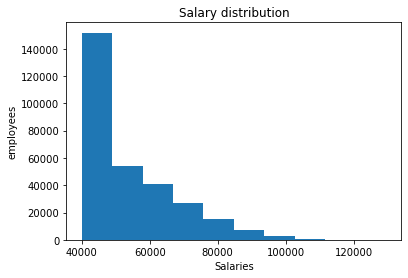

In [38]:
# Create a histogram to visualize the most common salary ranges for employees.

plt.hist(sal_df[1])
plt.title("Salary distribution")
plt.xlabel("Salaries")
plt.ylabel("employees")
plt.show() 

In [29]:
#execute SQL query to extract avgsalary_title data
data5 = engine.execute("SELECT ROUND(AVG(s.salary),2), e.emp_title_id AS title FROM salaries s JOIN employees e USING (emp_no) GROUP BY emp_title_id;")

In [30]:
#Creat avgsalary_title df
avgsal_df = pd.DataFrame(data5)

In [31]:
avgsal_df.head(10)

,0,1
0,48564.43,e0001
1,48535.34,e0002
2,48506.80,e0003
3,48582.90,e0004
4,51531.04,m0001
5,58465.38,s0001
6,58550.17,s0002


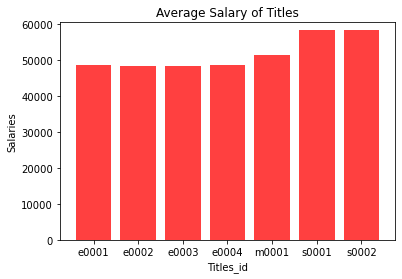

In [35]:
#Create a bar chart of average salary by title.

title = avgsal_df[1]
salary = avgsal_df[0]
x_axis = np.arange(0, len(avgsal_df[1]))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Average Salary of Titles")
plt.xlabel("Titles_id")
plt.ylabel("Salaries")

plt.xlim(-0.75, len(avgsal_df[1])-.25)
plt.ylim(0, max(salary) + 2000)

plt.bar(x_axis, salary, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, title)
plt.show()